<a href="https://colab.research.google.com/github/lucasgcb/redes-neurais/blob/main/cesar_fuzzy_codigo_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lógica Fuzzy com Python: O Guia para Iniciantes: Exemplo das gorgetas

**Antecedentes (entradas)**

Volume Tidal (VT): qual o volume tidal em ml? 
- sucesso acima de 315 ml, fracasso abaixo de 315 ml.

RSBI(RR/TIDAL) RM/l: qual o RSBI? 
- sucesso <=80 BM/L, fracasso >=120 BM/L.

Taxa respiratória (RR) (respirações/minuto): qual a taxa respiratória?
- sucesso < 30 R/M, fracasso >=35 R/M

Pico negativo da pressão inspiratória (NIF) (cm.H2O): Qual o pico negativo de pressão inspiratória?
- sucesso < -26 CM H2O, fracasso > -20CM H2O

**Consequentes (saídas)**

Ação: desmame ou não, entre 0 e 20?
- onde <= 10 falha e >10 sucesso

Regras
- Se o VT for *<315* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


# Instalação e importação das bibliotecas

- Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html

In [1]:
!pip install scikit-fuzzy
#!pip install scikit-fuzzy == 0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=9adb66fdee69ad2de8e609d1f86094bcadb9d8bc87416d19fe1398937c94c27a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [35]:
np.arange(-60,-10, 1)

array([-60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48,
       -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35,
       -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22,
       -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11])

In [42]:
NIF = ctrl.Antecedent(np.arange(-60, -9, 1), 'NIF')
VT = ctrl.Antecedent(np.arange(124, 951, 1), 'VT')
RR = ctrl.Antecedent(np.arange(13, 47, 1), 'RR')

In [43]:
NIF

Antecedent: NIF

In [156]:

RR.universe


array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [49]:
desmame = ctrl.Consequent(np.arange(0, 21, 1), 'desmame')

In [50]:
desmame.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [93]:
NIF.automf(number = 2, names = ['Sucesso', 'Fracasso'])
VT.automf(number = 2, names = ['Sucesso', 'Fracasso'])
RR.automf(number = 2, names = ['Sucesso', 'Fracasso'])

In [118]:
NIF['Sucesso'] = fuzz.trimf(NIF.universe, [-60,-60,-20])
NIF['Fracasso'] = fuzz.trimf(NIF.universe, [-26,-10,-10])

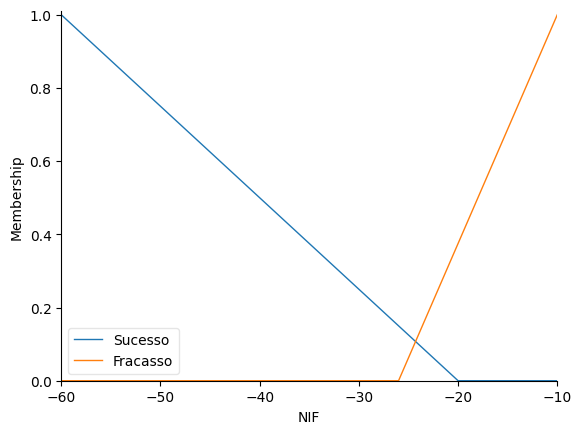

In [119]:
NIF.view()

In [161]:
VT['Sucesso'] = fuzz.trimf(VT.universe, [250,950,950])
VT['Fracasso'] = fuzz.trimf(VT.universe, [124,124,500])


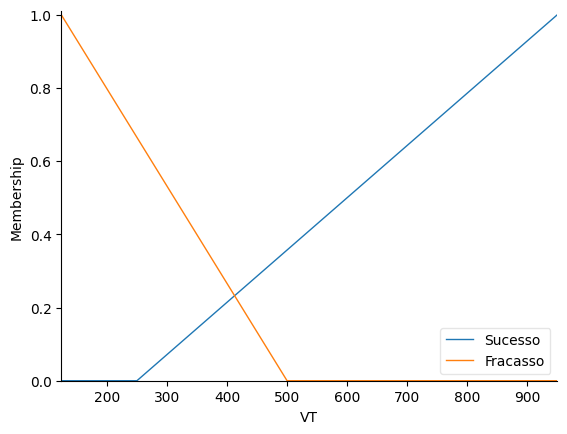

In [162]:
VT.view()

In [165]:
RR['Fracasso'] = fuzz.trimf(RR.universe, [30,46,46])
RR['Sucesso'] = fuzz.trimf(RR.universe, [13,13,35])

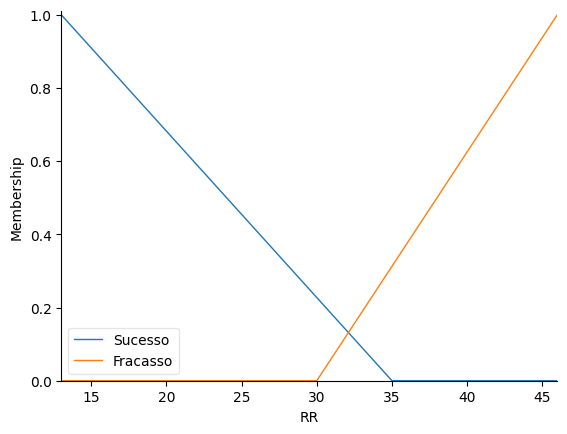

In [166]:
RR.view()

In [167]:
desmame.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [176]:
# função triangular
desmame['Sucesso'] = fuzz.trimf(desmame.universe, [0, 0, 20])
desmame['Fracasso'] = fuzz.trimf(desmame.universe, [0, 20, 20])

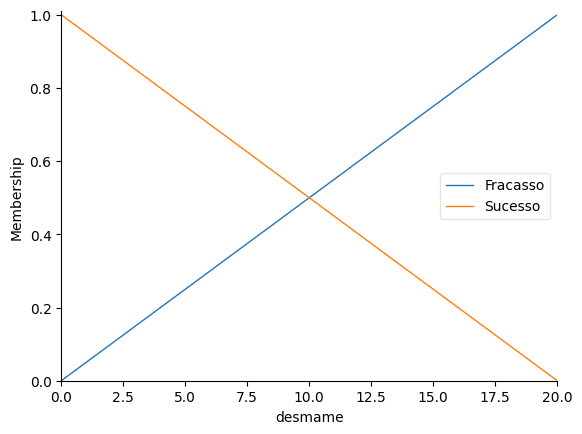

In [177]:
desmame.view()

In [180]:
regra1 = ctrl.Rule(NIF['Fracasso'] & VT['Fracasso'] & RR['Fracasso'], desmame['Fracasso'])
regra2 = ctrl.Rule(NIF['Fracasso'] & VT['Fracasso'] & RR['Sucesso'], desmame['Fracasso'])
regra3 = ctrl.Rule(NIF['Fracasso'] & VT['Sucesso'] & RR['Fracasso'], desmame['Fracasso'])
regra4 = ctrl.Rule(NIF['Sucesso'] & VT['Fracasso'] & RR['Fracasso'], desmame['Fracasso'])
regra5 = ctrl.Rule(NIF['Sucesso'] & VT['Sucesso'] & RR['Sucesso'], desmame['Sucesso'])
regra6 = ctrl.Rule(NIF['Fracasso'] & VT['Sucesso'] & RR['Sucesso'], desmame['Sucesso'])
regra7 = ctrl.Rule(NIF['Sucesso'] & VT['Sucesso'] & RR['Fracasso'], desmame['Sucesso'])
regra8 = ctrl.Rule(NIF['Sucesso'] & VT['Fracasso'] & RR['Sucesso'], desmame['Sucesso'])


## Sistema de controle

In [181]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3,regra4, regra5, regra6,regra7, regra8])

In [182]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [187]:
sistema.input['NIF'] = -30
sistema.input['RR'] = 30
sistema.input['VT'] = 250
sistema.compute()

8.912198912198914


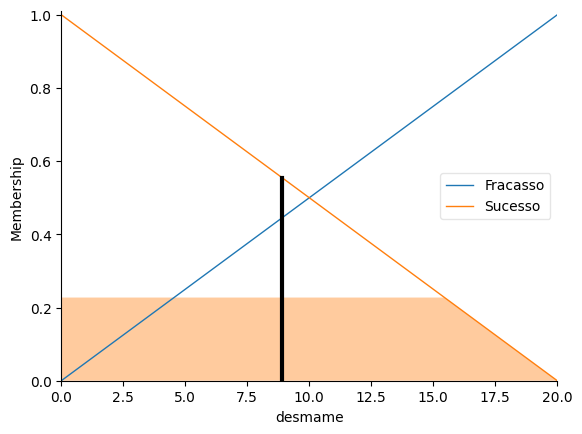

In [188]:
print(sistema.output['desmame'])
desmame.view(sim = sistema)

# Outras funções

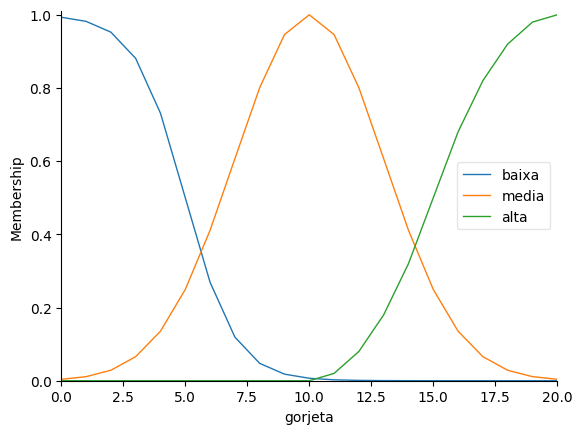

In [23]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)
gorjeta.view()

In [24]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

In [25]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [26]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [27]:
sistema.input['qualidade'] = 1
sistema.input['servico'] = 1
sistema.compute()

5.662380878042331


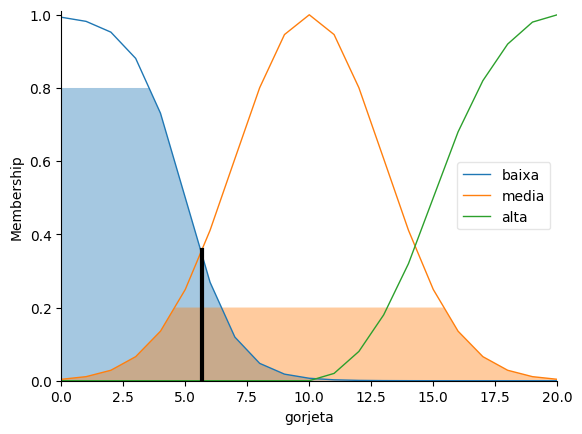

In [28]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)